Импортируем нужные библиотеки.

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro

Импортируем датасет.



In [ ]:
data = pd.read_csv('/content/data_rrg_big.csv')

# Так выглядит изначальный датасет.

In [ ]:
data

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
0,АГ-001_1,0.911795,0.852760,0.912,0.852,0.019906,0.028938,0.812,0.636,0.948,1.056,0.913706,0.852877,0.020,0.032,0.012,0.016,AG
1,АГ-002_1,0.729976,0.659733,0.728,0.660,0.032458,0.029800,0.580,0.576,0.856,0.760,0.728587,0.659980,0.040,0.040,0.020,0.020,AG
2,АГ-003_1,0.948242,0.702628,0.948,0.704,0.038755,0.047599,0.796,0.512,1.084,1.572,0.948345,0.702581,0.052,0.056,0.024,0.028,AG
3,АГ-004_1,1.166237,0.889435,1.184,0.894,0.070413,0.058731,0.896,0.716,1.300,1.032,1.174049,0.890913,0.084,0.072,0.040,0.038,AG
4,АГ-005_1,0.730133,0.663203,0.728,0.664,0.027302,0.031371,0.652,0.552,0.884,0.820,0.729099,0.663184,0.036,0.036,0.016,0.016,AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,IM-104_ПС,NaN,0.614224,NaN,0.612,NaN,0.031489,NaN,0.392,NaN,0.940,NaN,0.611474,NaN,0.012,NaN,0.008,IM6
290,IM-108_П4,0.874383,NaN,0.880,NaN,0.072025,NaN,0.372,NaN,1.228,NaN,0.880785,NaN,0.024,NaN,0.012,NaN,IM6
291,IM-108_ПС,NaN,0.721575,NaN,0.748,NaN,0.118658,NaN,0.380,NaN,1.000,NaN,0.736784,NaN,0.104,NaN,0.052,IM6
292,IM-111_4ПС2,1.007668,1.045978,1.012,1.044,0.031950,0.023522,0.840,0.960,1.088,1.112,1.008929,1.046059,0.048,0.032,0.024,0.016,IM6


# Проводим анализ между гипертониками(AG) и здоровыми(H).

Уберем группы IM и IM6, а также id для удобства.

In [ ]:
data = data[(data['patient'] == 'AG') | (data['patient'] == 'H')]

In [ ]:
data = data.drop('id', axis=1)

In [ ]:
data.patient.value_counts()

,count
patient,
AG,64
H,36


Сразу можно заметить, что данных о гипертониках(AG) больше, чем о здоровых(H).



Для начала проведем анализ по признакам.

In [ ]:
data.groupby('patient')['rrg_mean_лежа'].agg(['mean', 'median', 'std'])

,mean,median,std
patient,,,
AG,0.927314,0.927767,0.140633
H,0.829833,0.842149,0.136565


In [ ]:
data.groupby('patient')['rrg_mean_стоя'].agg(['mean', 'median', 'std'])

,mean,median,std
patient,,,
AG,0.762247,0.750424,0.125383
H,0.614012,0.629703,0.101186


Проведем анализ графиков и посмотрим на распределение значений.

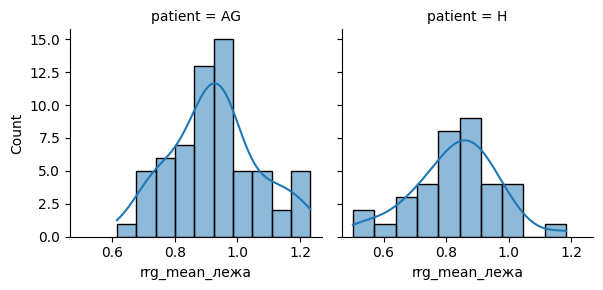

In [ ]:
g = sns.FacetGrid (data=data, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrg_mean_лежа', bins=10, kde=True)

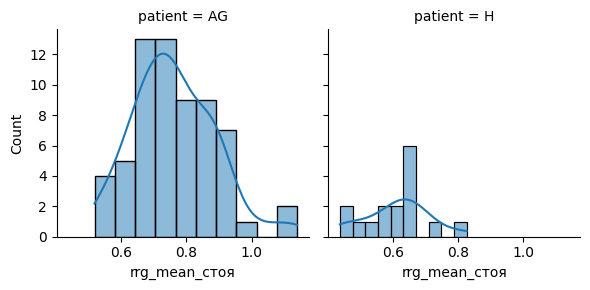

In [ ]:
g = sns.FacetGrid (data=data, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrg_mean_стоя', bins=10, kde=True)

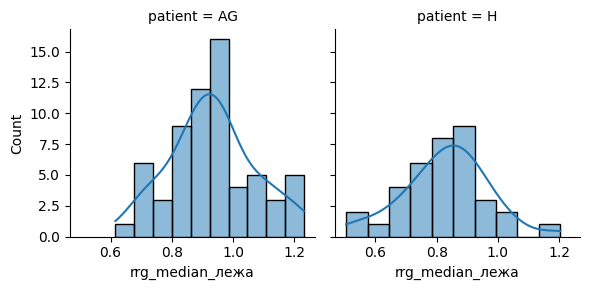

In [ ]:
g = sns.FacetGrid (data=data, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrg_median_лежа', bins=10, kde=True)

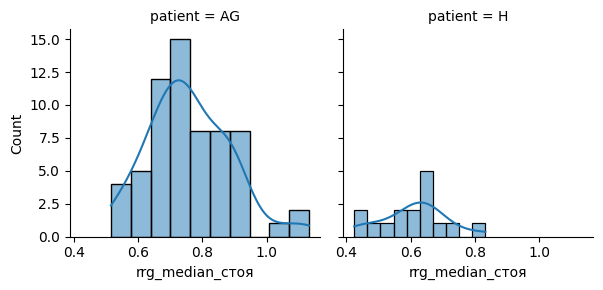

In [ ]:
g = sns.FacetGrid (data=data, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrg_median_стоя', bins=10, kde=True)

Исходя из графиков, средние значение и медина имеет нормальное распределение.

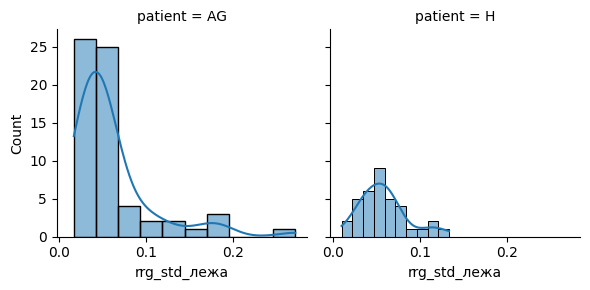

In [ ]:
g = sns.FacetGrid (data=data, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrg_std_лежа', bins=10, kde=True)

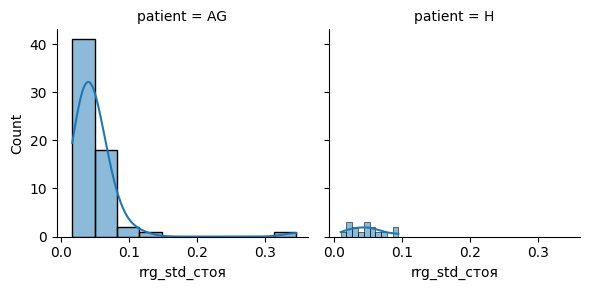

In [ ]:
g = sns.FacetGrid (data=data, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrg_std_стоя', bins=10, kde=True)

Исходя из графиков, стандартное отклонение имеет логнормальное распределение.

Чтобы расчитать показатель изменичивости вариабильности ЧСС, мы создаем переменные, которые показывают изменения показателя rrg в процентах.

In [ ]:
data['rrg_mean_лежа/rrg_mean_стоя в %'] = ((data['rrg_mean_лежа'] / data['rrg_mean_стоя']).round(3) * 100 - 100)
data['rrg_median_лежа/rrg_median_стоя в %'] = ((data['rrg_median_лежа'] / data['rrg_median_стоя']).round(3) * 100 - 100)
data['rrg_trim_mean_лежа/rrg_trim_mean_стоя в %'] = ((data['rrg_mean_лежа'] / data['rrg_mean_стоя']).round(3) * 100 - 100)

# Так выглядит датасет после добавления переменных.

In [ ]:
data

,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient,rrg_mean_лежа/rrg_mean_стоя в %,rrg_median_лежа/rrg_median_стоя в %,rrg_trim_mean_лежа/rrg_trim_mean_стоя в %
0,0.911795,0.852760,0.912,0.852,0.019906,0.028938,0.812,0.636,0.948,1.056,0.913706,0.852877,0.020,0.032,0.012,0.016,AG,6.9,7.0,6.9
1,0.729976,0.659733,0.728,0.660,0.032458,0.029800,0.580,0.576,0.856,0.760,0.728587,0.659980,0.040,0.040,0.020,0.020,AG,10.6,10.3,10.6
2,0.948242,0.702628,0.948,0.704,0.038755,0.047599,0.796,0.512,1.084,1.572,0.948345,0.702581,0.052,0.056,0.024,0.028,AG,35.0,34.7,35.0
3,1.166237,0.889435,1.184,0.894,0.070413,0.058731,0.896,0.716,1.300,1.032,1.174049,0.890913,0.084,0.072,0.040,0.038,AG,31.1,32.4,31.1
4,0.730133,0.663203,0.728,0.664,0.027302,0.031371,0.652,0.552,0.884,0.820,0.729099,0.663184,0.036,0.036,0.016,0.016,AG,10.1,9.6,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.912288,0.660899,0.908,0.652,0.061389,0.070184,0.432,0.508,1.616,1.920,0.911013,0.656049,0.056,0.073,0.024,0.036,H,38.0,39.3,38.0
96,0.742534,0.668329,0.740,0.672,0.045142,0.041371,0.624,0.400,1.144,0.808,0.740360,0.668810,0.048,0.052,0.024,0.028,H,11.1,10.1,11.1
97,0.875930,0.668060,0.876,0.656,0.058703,0.056872,0.376,0.388,1.148,0.856,0.877613,0.663784,0.068,0.068,0.036,0.032,H,31.1,33.5,31.1
98,1.182965,0.736188,1.204,0.732,0.116725,0.064817,0.384,0.584,1.420,1.000,1.193240,0.733194,0.150,0.076,0.072,0.040,H,60.7,64.5,60.7


Чтобы проанализировать и выдвинуть гипотезу, строим графики распределения значений(Boxplot'ы).
1. Изменения среднего показателя rrg в процентах у разных групп здоровья пациентов.
2. Изменения медианы rrg в процентах у разных групп здоровья пациентов.
3. Изменения среднего усеченного показателя rrg в процентах у разных групп здоровья пациентов.

<Axes: xlabel='patient', ylabel='rrg_mean_лежа/rrg_mean_стоя в %'>

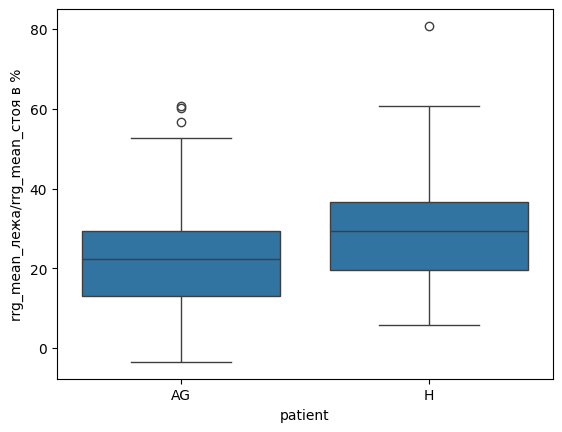

In [ ]:
sns.boxplot(data=data, x='patient', y=data['rrg_mean_лежа/rrg_mean_стоя в %'])

<Axes: xlabel='patient', ylabel='rrg_median_лежа/rrg_median_стоя в %'>

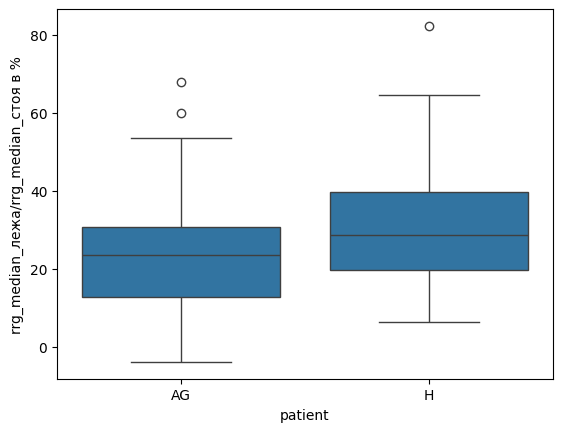

In [ ]:
sns.boxplot(data=data, x='patient', y=data['rrg_median_лежа/rrg_median_стоя в %'])

<Axes: xlabel='patient', ylabel='rrg_trim_mean_лежа/rrg_trim_mean_стоя в %'>

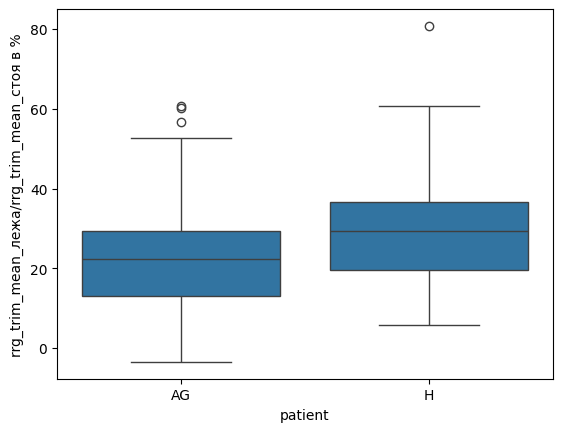

In [ ]:
sns.boxplot(data=data, x='patient', y=data['rrg_trim_mean_лежа/rrg_trim_mean_стоя в %'])

Для того, чтобы понять соответствуют ли данные логарифмически нормальному распределению, проведем тест Шапиро-Уилка.

In [ ]:
print(shapiro(data[data['patient'] == 'H']['rrg_mean_лежа'].dropna()))
print(shapiro(data[data['patient'] == 'H']['rrg_mean_стоя'].dropna()))
print(shapiro(data[data['patient'] == 'AG']['rrg_mean_лежа'].dropna()))
print(shapiro(data[data['patient'] == 'AG']['rrg_mean_стоя'].dropna()))

ShapiroResult(statistic=0.9772944312060687, pvalue=0.6534983006455399)
ShapiroResult(statistic=0.9537492276935854, pvalue=0.5513059454515357)
ShapiroResult(statistic=0.9799072057065423, pvalue=0.3809664046541219)
ShapiroResult(statistic=0.9739790150616071, pvalue=0.20210727240312992)


Поскольку все p-значение наших тестов больше, чем альфа = 0,05, данные о здоровых(H) и гипертониках(AG) соответствуют логарифмически нормальному распределению, мы можем проводить T-тесты.

1. На графиках видно, что rrg в положении лежа в среднем больше, чем rrg в положении стоя, у групп гипертоников(AG) и здоровых(H). Но у здоровых показатель изменичивости вариабильности ЧСС выше, чем у гипертоников, тоесть у здоровых разброс значений ЧСС больше.

2. Исходя из значений в графиках предположим, что при переходе из положения лежа в положение стоя, rrg становиться меньше, то есть ЧСС увеличивается.

*   H0(нулевая гипотеза) - При переходе из положения лежа в положение стоя, rrg не изменяется, то есть ЧСС тоже не изменяется.
*   H1(альтернативная гипотеза) - При переходе из положения лежа в положение стоя, rrg изменяется, то есть ЧСС тоже изменяется.

Также на графиках видно, что rrg в положении лежа в среднем больше, чем rrg в положении стоя, значит если нулевая гипотеза отвергается, сразу можно сказать что при переходе из положения лежа в положение стоя, rrg становиться меньше, то есть ЧСС увеличивается.

**Мы будем использовать T-критерий. Тестироваться данные будут на разных группах пациентов.**

In [ ]:
rrg_mean_лежа_AG = data[data['patient'] == 'AG']['rrg_mean_лежа'].dropna()
rrg_mean_стоя_AG = data[data['patient'] == 'AG']['rrg_mean_стоя'].dropna()
stats.ttest_ind(a=rrg_mean_стоя_AG, b=rrg_mean_лежа_AG)

TtestResult(statistic=-6.9780135869700874, pvalue=1.5521267302490208e-10, df=125.0)

Поскольку p-значение нашего теста (1.5521267302490208e-10) меньше, чем альфа = 0,05, мы можем отвергнуть нулевую гипотезу теста. У нас есть данные, чтобы сказать, что у гипертоников при переходе из положения лежа в положение стоя, rrg становиться меньше, то есть ЧСС увеличивается. Это подтверждает и графики, и тест.


In [ ]:
rrg_mean_лежа_H = data[data['patient'] == 'H']['rrg_mean_лежа'].dropna()
rrg_mean_стоя_H = data[data['patient'] == 'H']['rrg_mean_стоя'].dropna()
stats.ttest_ind(a=rrg_mean_стоя_H, b=rrg_mean_лежа_H)

TtestResult(statistic=-5.656295326106736, pvalue=7.450057399992547e-07, df=50.0)

Поскольку p-значение нашего теста (7.450057399992547e-07) меньше, чем альфа = 0,05, мы можем отвергнуть нулевую гипотезу теста. У нас есть данные, чтобы сказать, что у здоровых при переходе из положения лежа в положение стоя, rrg становиться меньше, то есть ЧСС увеличивается. Это подтверждает и графики, и тест.

Следовательно, мы можем сказать, что при переходе из положения лежа в положение стоя, что у здоровых, что у гипертоников в среднем rrg становится меньше, то есть ЧСС увеличивается.

Исходя из первичного анализа данных, мы можем выделить, что в среднем rrg и ЧСС гипертоников(AG) в положении лежа и стоя в среднем больше, чем rrg здоровых(H). Чтобы подтвердить наши предположения, проведем Т-тесты.

*   H0(нулевая гипотеза) - различие rrg и следовательно ЧСС в группах не значительны.
*   H1(альтернативная гипотеза) - различия rrg и следовательно ЧСС в группах есть.

Исходя из анализа и тестов, если нулевая гипотеза отврегается, мы можем быть уверены, что в среднем rrg и ЧСС у гипертоников(AG) больше, чем у здоровых(H).



In [ ]:
stats.ttest_ind(a=rrg_mean_стоя_H, b=rrg_mean_стоя_AG)

TtestResult(statistic=-4.37425837129357, pvalue=3.7760718085060494e-05, df=77.0)

Поскольку p-значение нашего теста (3.7760718085060494e-05) меньше, чем альфа = 0,05, мы можем отвергнуть нулевую гипотезу теста. У нас есть данные, чтобы сказать, что в среднем в положении стоя, у здоровых(H) показатель rrg меньше, чем у гипертоников(AG), следовательно ЧСС у здоровых в положении стоя больше.

In [ ]:
stats.ttest_ind(a=rrg_mean_лежа_H, b=rrg_mean_лежа_AG)

TtestResult(statistic=-3.3615787334247327, pvalue=0.0011061418215916163, df=98.0)

Поскольку p-значение нашего теста (0.0011061418215916163) меньше, чем альфа = 0,05, мы можем отвергнуть нулевую гипотезу теста. У нас есть данные, чтобы сказать, что в среднем в положении лежа, у здоровых(H) показатель rrg меньше, чем у гипертоников(AG), следовательно ЧСС у здоровых в положении лежа больше.

После проведения анализа и проверки статистическими тестами, мы можем сказать, что у здоровых, rrg в среднем меньше, чем у гипертоников, в двух положениях, а значит ЧСС больше